# Score function for the exponential distribution

In [1]:
import numpy as np
from scipy.stats import expon

import matplotlib.pyplot as plt

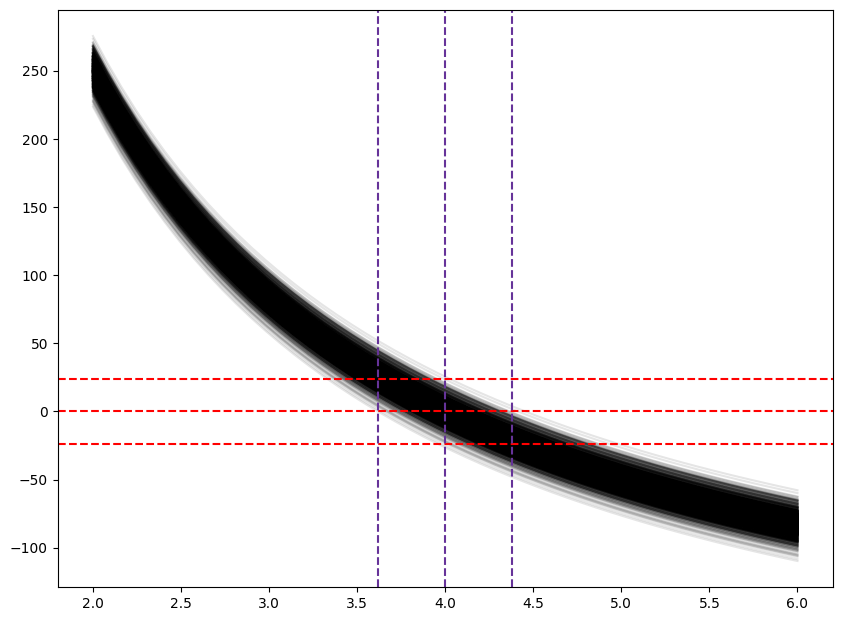

In [2]:
theta0 = 4

N = 1000 # sample size
M = 1000  # number of simulations

t_vect = np.linspace(2, 6)
hat_theta_vect = []
score_theta0 = []

plt.figure(figsize=(10,7.5))

for _ in range(M):

    sample = expon.rvs(scale=1/theta0, size=N)
    hat_theta =  1/sample.mean()

    def score(t):
        return N/t-N/hat_theta
    
    hat_theta_vect.append(hat_theta)
    score_theta0.append(score(theta0))

    plt.plot(t_vect, [score(t) for t in t_vect], color='k', alpha=0.1)

plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3*np.sqrt(N)/theta0, color='r', linestyle='--')
plt.axhline(y=-3*np.sqrt(N)/theta0, color='r', linestyle='--')

plt.axvline(x=theta0, color='rebeccapurple', linestyle='--')
plt.axvline(x=theta0-3*theta0/np.sqrt(N), color='rebeccapurple', linestyle='--')
plt.axvline(x=theta0+3*theta0/np.sqrt(N), color='rebeccapurple', linestyle='--')

Note that, while the red vertical interval becomes wider when we have a larger sample size, the purple horizontal interval becomes tighter. This is because the vertical interval is proportional to the (square root of the) Fisher information. While the horizontal interval is given by $$\theta_0\pm 3 \sqrt{n/J(\theta_0)}$$

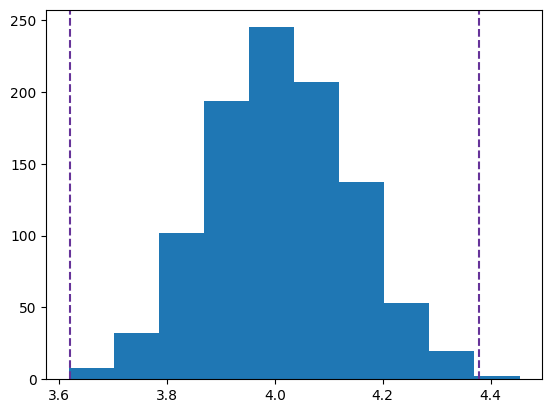

In [3]:
theta0-3*theta0/np.sqrt(N), theta0+3*theta0/np.sqrt(N)

plt.hist(hat_theta_vect)
plt.axvline(x=theta0-3*theta0/np.sqrt(N), color='rebeccapurple', linestyle='--')
plt.axvline(x=theta0+3*theta0/np.sqrt(N), color='rebeccapurple', linestyle='--')

Remember that the expected Fisher infomration per sample unit is given by $1/\theta_0^2$, and that it is the variance of the score function in the real value. Thus, an approx. confidence interval of 99.73% of prob. for the score function evaluated in the real value is given by
$$\pm 3 \sqrt{J(\theta_0)}=\pm 3 \sqrt{n}/\theta_0.$$

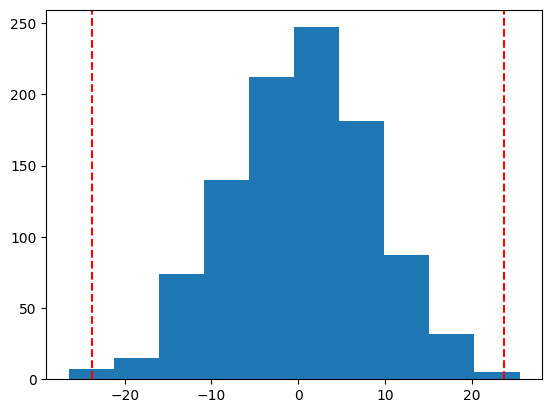

In [4]:
3*np.sqrt(N)/theta0, -3*np.sqrt(N)/theta0

plt.hist(score_theta0)
plt.axvline(x=3*np.sqrt(N)/theta0, color='r', linestyle='--')
plt.axvline(x=-3*np.sqrt(N)/theta0, color='r', linestyle='--')